# Credit Card Fraud Detection 

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE 
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [6]:
#Here there are 2 csv files one for training and other for testing

df1=pd.read_csv("/Users/sobhione/Documents/JENSENS-SCHOOL/ML-Supervised-Learning/ML-Supervised-learning-2/Positive_negative/dfv3-1.csv")
df2=pd.read_csv("/Users/sobhione/Documents/JENSENS-SCHOOL/ML-Supervised-Learning/ML-Supervised-learning-2/Positive_negative/dfv3-2.csv")


Appending both files for analysis


In [7]:
df=pd.concat([df1,df2],axis=0)


# Understanding The data Data

In [8]:
print('df1:',df1.shape)
print('df2:',df2.shape)
print('df is now Concatenated:',df.shape)
df.head()

df1: (10000, 23)
df2: (10000, 23)
df is now Concatenated: (20000, 23)


,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,261604,25-09-2020 21:36,5.359540e+15,fraud_Mosciski Group,travel,8517.38,Michael,Francis,M,1833 Jeanette Stravenue,...,45.7801,-111.1439,18182,"Engineer, drilling",29-06-1975,e5b4abde3491493d1d9897b24cba9c58,1380145007,45.534538,-111.433653,0
1,375959,15-11-2020 04:58,3.513620e+15,fraud_Dooley-Thompson,misc_net,187.99,Amber,Perez,F,954 Reyes Ways,...,43.7588,-97.8712,355,Financial adviser,26-06-1955,23eeeb38d1016ec5d1f68437fb111321,1384491501,44.691168,-97.995122,0
2,372597,13-11-2020 12:15,3.023540e+13,fraud_Roberts-Beahan,misc_pos,7.81,James,Baldwin,M,3603 Mitchell Court,...,38.5072,-81.8900,5512,Exhibition designer,24-03-1980,bd72062b703de9aa426c7e73f13ec98e,1384344918,39.201981,-82.561837,0
3,23294,29-06-2020 08:55,6.011100e+15,fraud_Kunze Inc,grocery_pos,122.29,Valerie,Davis,F,3861 Anderson Ramp Apt. 536,...,36.9688,-78.5615,1970,Energy engineer,02-09-1985,d3103041c5cdafbd7d524696f0c9d14c,1372496117,37.252716,-78.808775,0
4,76765,18-07-2020 06:56,3.537800e+15,"fraud_Greenholt, O'Hara and Balistreri",shopping_net,9.21,Christie,Mendoza,F,53142 Katrina Roads Suite 889,...,47.4852,-120.4158,584,Medical technical officer,20-03-1969,4bbce2b5e7be7af611c5da55ca50f691,1374130600,46.970765,-119.542727,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20000 entries, 0 to 9999
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             20000 non-null  int64  
 1   trans_date_trans_time  20000 non-null  object 
 2   cc_num                 20000 non-null  float64
 3   merchant               20000 non-null  object 
 4   category               20000 non-null  object 
 5   amt                    20000 non-null  float64
 6   first                  20000 non-null  object 
 7   last                   20000 non-null  object 
 8   gender                 20000 non-null  object 
 9   street                 20000 non-null  object 
 10  city                   20000 non-null  object 
 11  state                  20000 non-null  object 
 12  zip                    20000 non-null  int64  
 13  lat                    20000 non-null  float64
 14  long                   20000 non-null  float64
 15  city_pop

In [10]:
# print trans_date_trans_time datatype

#changing datatypes
df.trans_date_trans_time=pd.to_datetime(df.trans_date_trans_time)
df.dob=pd.to_datetime(df.dob)

df.describe()




,Unnamed: 0,trans_date_trans_time,cc_num,amt,zip,lat,long,city_pop,dob,unix_time,merch_lat,merch_long,is_fraud
count,2.000000e+04,20000,2.000000e+04,20000.000000,20000.000000,20000.000000,20000.000000,2.000000e+04,20000,2.000000e+04,20000.000000,20000.000000,20000.000000
mean,4.611270e+05,2020-04-02 01:56:03.174000128,4.151807e+17,71.959140,48680.263350,38.556952,-90.129628,8.953998e+04,1974-01-10 05:33:04.320000,1.364899e+09,38.557039,-90.127333,0.005250
min,5.000000e+00,2019-01-01 00:32:00,6.041621e+10,1.000000,1257.000000,20.027100,-165.672300,2.300000e+01,1924-10-30 00:00:00,1.325378e+09,19.106627,-166.643193,0.000000
25%,1.935712e+05,2019-09-29 20:20:45,1.800470e+14,9.680000,26041.000000,34.703100,-96.727000,7.590000e+02,1962-11-18 00:00:00,1.348950e+09,34.774127,-96.779962,0.000000
50%,3.888505e+05,2020-06-21 12:11:30,3.525590e+15,47.850000,48174.000000,39.371600,-87.456900,2.456000e+03,1976-01-10 00:00:00,1.371817e+09,39.352261,-87.381909,0.000000
75%,6.408648e+05,2020-10-03 10:12:45,4.642260e+15,83.620000,72011.000000,42.014400,-80.128400,2.063975e+04,1987-07-18 00:00:00,1.380795e+09,41.980973,-80.157995,0.000000
max,1.296665e+06,2020-12-31 23:46:00,4.992350e+18,14637.790000,99921.000000,65.689900,-67.950300,2.906700e+06,2005-01-29 00:00:00,1.388534e+09,66.650388,-66.963918,1.000000
std,3.408648e+05,NaN,1.307965e+18,207.438308,26843.514907,5.067289,13.684487,2.994319e+05,NaN,1.853175e+07,5.101034,13.696854,0.072268


In [11]:
df.describe(include=['object']).T

,count,unique,top,freq
merchant,20000,693,fraud_Kilback LLC,79
category,20000,14,gas_transport,1946
first,20000,338,Christopher,423
last,20000,465,Smith,419
gender,20000,2,F,10971
street,20000,915,03512 Jackson Ports,67
city,20000,841,Birmingham,100
state,20000,50,TX,1440
job,20000,475,Film/video editor,163
trans_num,20000,20000,e5b4abde3491493d1d9897b24cba9c58,1


# Drop unwanted columns

In [12]:
# drop unwanted columns

df.drop(['Unnamed: 0', 'zip', 'trans_num','city','street'],axis=1,inplace=True)

# Extraction

Extract year, month,dayname and hour from trans_date_trans_time

In [13]:
# Extract year, month,dayname and hour from trans_date_trans_time

df['year']=df.trans_date_trans_time.dt.year
df['month']=df.trans_date_trans_time.dt.month
df['day_name']=df.trans_date_trans_time.dt.day_name()
df['hour']=df.trans_date_trans_time.dt.hour
    

Extract age from dob

In [14]:
# Extract age from dob
#df["age"]=df.year-df["dob"].dt.year

df['age']=df.dob.apply(lambda x:(pd.Timestamp.now().year - x.year))
    
#print
df.head()


,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,state,lat,...,dob,unix_time,merch_lat,merch_long,is_fraud,year,month,day_name,hour,age
0,2020-09-25 21:36:00,5.359540e+15,fraud_Mosciski Group,travel,8517.38,Michael,Francis,M,MT,45.7801,...,1975-06-29,1380145007,45.534538,-111.433653,0,2020,9,Friday,21,48
1,2020-11-15 04:58:00,3.513620e+15,fraud_Dooley-Thompson,misc_net,187.99,Amber,Perez,F,SD,43.7588,...,1955-06-26,1384491501,44.691168,-97.995122,0,2020,11,Sunday,4,68
2,2020-11-13 12:15:00,3.023540e+13,fraud_Roberts-Beahan,misc_pos,7.81,James,Baldwin,M,WV,38.5072,...,1980-03-24,1384344918,39.201981,-82.561837,0,2020,11,Friday,12,43
3,2020-06-29 08:55:00,6.011100e+15,fraud_Kunze Inc,grocery_pos,122.29,Valerie,Davis,F,VA,36.9688,...,1985-09-02,1372496117,37.252716,-78.808775,0,2020,6,Monday,8,38
4,2020-07-18 06:56:00,3.537800e+15,"fraud_Greenholt, O'Hara and Balistreri",shopping_net,9.21,Christie,Mendoza,F,WA,47.4852,...,1969-03-20,1374130600,46.970765,-119.542727,0,2020,7,Saturday,6,54


 Extract distance from customer to merchant

 Personal Info (The .abs() method is a pandas function that calculates the absolute value of a numeric series or DataFrame.)

In [15]:
#  Extract distance from customer to merchant
df["lat_dist_cust_merch"]=(df["lat"]-df["merch_lat"]).abs() 
df.head()


,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,state,lat,...,unix_time,merch_lat,merch_long,is_fraud,year,month,day_name,hour,age,lat_dist_cust_merch
0,2020-09-25 21:36:00,5.359540e+15,fraud_Mosciski Group,travel,8517.38,Michael,Francis,M,MT,45.7801,...,1380145007,45.534538,-111.433653,0,2020,9,Friday,21,48,0.245562
1,2020-11-15 04:58:00,3.513620e+15,fraud_Dooley-Thompson,misc_net,187.99,Amber,Perez,F,SD,43.7588,...,1384491501,44.691168,-97.995122,0,2020,11,Sunday,4,68,0.932368
2,2020-11-13 12:15:00,3.023540e+13,fraud_Roberts-Beahan,misc_pos,7.81,James,Baldwin,M,WV,38.5072,...,1384344918,39.201981,-82.561837,0,2020,11,Friday,12,43,0.694781
3,2020-06-29 08:55:00,6.011100e+15,fraud_Kunze Inc,grocery_pos,122.29,Valerie,Davis,F,VA,36.9688,...,1372496117,37.252716,-78.808775,0,2020,6,Monday,8,38,0.283916
4,2020-07-18 06:56:00,3.537800e+15,"fraud_Greenholt, O'Hara and Balistreri",shopping_net,9.21,Christie,Mendoza,F,WA,47.4852,...,1374130600,46.970765,-119.542727,0,2020,7,Saturday,6,54,0.514435


Extract distance from long merch_long 

In [16]:
df["long_dist_cust_merch"]=(df['long']-df['merch_long']).abs()
df.head()


,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,state,lat,...,merch_lat,merch_long,is_fraud,year,month,day_name,hour,age,lat_dist_cust_merch,long_dist_cust_merch
0,2020-09-25 21:36:00,5.359540e+15,fraud_Mosciski Group,travel,8517.38,Michael,Francis,M,MT,45.7801,...,45.534538,-111.433653,0,2020,9,Friday,21,48,0.245562,0.289753
1,2020-11-15 04:58:00,3.513620e+15,fraud_Dooley-Thompson,misc_net,187.99,Amber,Perez,F,SD,43.7588,...,44.691168,-97.995122,0,2020,11,Sunday,4,68,0.932368,0.123922
2,2020-11-13 12:15:00,3.023540e+13,fraud_Roberts-Beahan,misc_pos,7.81,James,Baldwin,M,WV,38.5072,...,39.201981,-82.561837,0,2020,11,Friday,12,43,0.694781,0.671837
3,2020-06-29 08:55:00,6.011100e+15,fraud_Kunze Inc,grocery_pos,122.29,Valerie,Davis,F,VA,36.9688,...,37.252716,-78.808775,0,2020,6,Monday,8,38,0.283916,0.247275
4,2020-07-18 06:56:00,3.537800e+15,"fraud_Greenholt, O'Hara and Balistreri",shopping_net,9.21,Christie,Mendoza,F,WA,47.4852,...,46.970765,-119.542727,0,2020,7,Saturday,6,54,0.514435,0.873073


# Drop unwanted columns

In [17]:
# drop columns lat, merch_lat,long, merch_long, dob and trans_date_trans_time

df.drop(['lat','merch_lat','long','merch_long','dob','trans_date_trans_time'], axis=1, inplace=True)
df.head()

,cc_num,merchant,category,amt,first,last,gender,state,city_pop,job,unix_time,is_fraud,year,month,day_name,hour,age,lat_dist_cust_merch,long_dist_cust_merch
0,5.359540e+15,fraud_Mosciski Group,travel,8517.38,Michael,Francis,M,MT,18182,"Engineer, drilling",1380145007,0,2020,9,Friday,21,48,0.245562,0.289753
1,3.513620e+15,fraud_Dooley-Thompson,misc_net,187.99,Amber,Perez,F,SD,355,Financial adviser,1384491501,0,2020,11,Sunday,4,68,0.932368,0.123922
2,3.023540e+13,fraud_Roberts-Beahan,misc_pos,7.81,James,Baldwin,M,WV,5512,Exhibition designer,1384344918,0,2020,11,Friday,12,43,0.694781,0.671837
3,6.011100e+15,fraud_Kunze Inc,grocery_pos,122.29,Valerie,Davis,F,VA,1970,Energy engineer,1372496117,0,2020,6,Monday,8,38,0.283916,0.247275
4,3.537800e+15,"fraud_Greenholt, O'Hara and Balistreri",shopping_net,9.21,Christie,Mendoza,F,WA,584,Medical technical officer,1374130600,0,2020,7,Saturday,6,54,0.514435,0.873073


Count the number of missing values in each column 

In [18]:
df.isnull().sum()

cc_num                  0
merchant                0
category                0
amt                     0
first                   0
last                    0
gender                  0
state                   0
city_pop                0
job                     0
unix_time               0
is_fraud                0
year                    0
month                   0
day_name                0
hour                    0
age                     0
lat_dist_cust_merch     0
long_dist_cust_merch    0
dtype: int64

In [19]:
# count the number of duplicate rows
df.duplicated().sum()

0

The code below you provided is selecting only the rows in the Pandas dataframe df where the value of the "is_fraud" column is equal to 1, indicating that the transaction is a fraudulent one. Here is what the code does

In [20]:
## consider only fraud data
fraud_data=df[df.is_fraud==1]

print(df.is_fraud.value_counts())
print("\nIn percentage(%)\n")
print(df.is_fraud.value_counts(normalize=True)*100)

is_fraud
0    19895
1      105
Name: count, dtype: int64

In percentage(%)

is_fraud
0    99.475
1     0.525
Name: proportion, dtype: float64


### Insight:
<font color='red'>At this moment The output suggests that the dataset is imbalanced, 
with a very small proportion of rows having "is_fraud" equal to 1. 
the model may be biased towards predicting non-fraudulent transactions. </font>


# Data Visualization



# where is the fraud Transaction done ?

<Axes: xlabel='count', ylabel='category'>

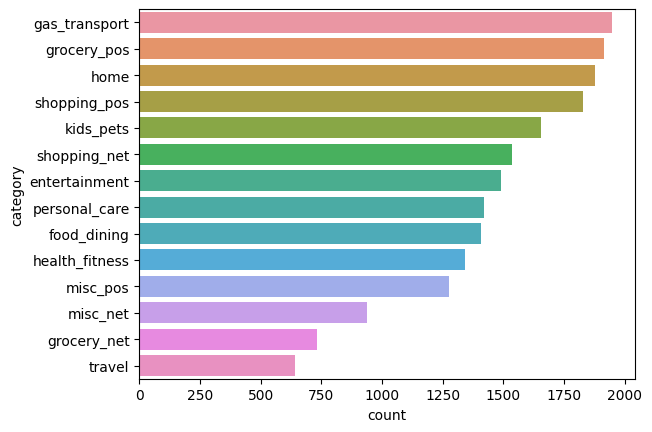

In [21]:
sns.countplot(y=df.category,order=df.category.value_counts().index)

### Insight:
* Most of the trasnsactions are done from gas transport ,home and grocery, least from travel

# Is the Fraud Gender based?

Text(0.5, 1.0, 'Fraud Data')

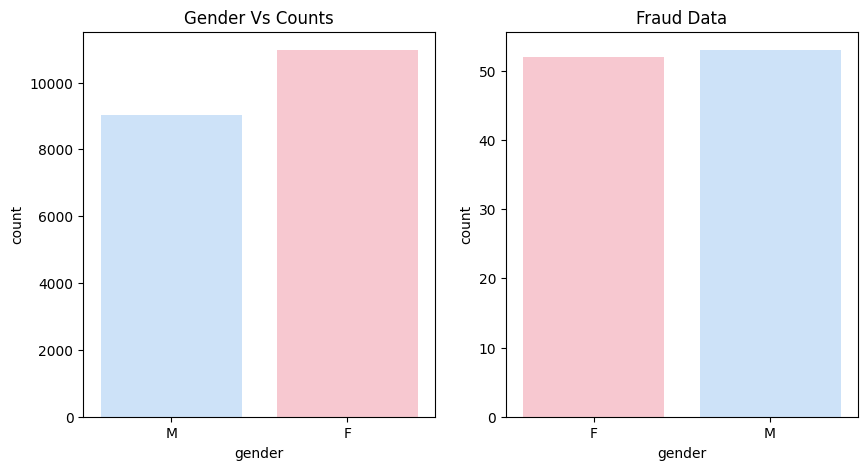

In [22]:
# create a plot where you compare gender vs count taking only fraud data

 #Set the color palette
colors = ['#c6e2ff', 'pink']

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.countplot(x=df.gender,palette=colors)
plt.title('Gender Vs Counts')
 
# create another plot
plt.subplot(1,2,2)
sns.countplot(x='gender', data=fraud_data ,palette=[colors[1], '#c6e2ff']) # using only fraud data
plt.title('Fraud Data')





### Insights: 
* The Gender is balanced so it is not dependant on target column.

# The the fraud amount and %

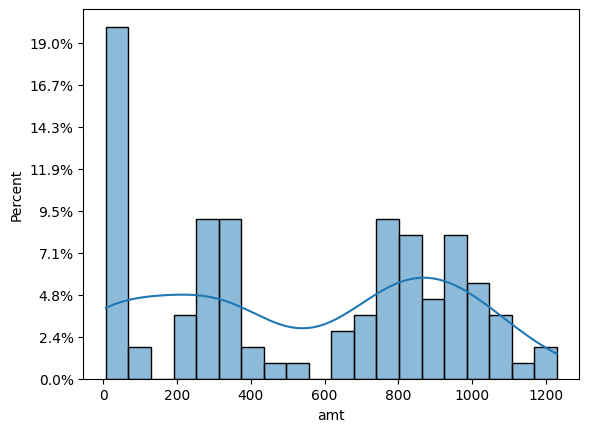

In [23]:
import matplotlib.ticker as ticker

# histplot for fraud amount vs percent

plot = sns.histplot(x='amt',data=fraud_data,bins= 20,stat='percent' ,kde=True) # using only fraud data

# Format y-axis labels with percentage sign
plot.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=len(fraud_data)))



#### Insights: 
* As we see Above the fraud amount starts at 0 USD to approximately 400USD and again it goes up from 600USD till 1200USD

Text(0.5, 1.0, 'Fraud Data in every State')

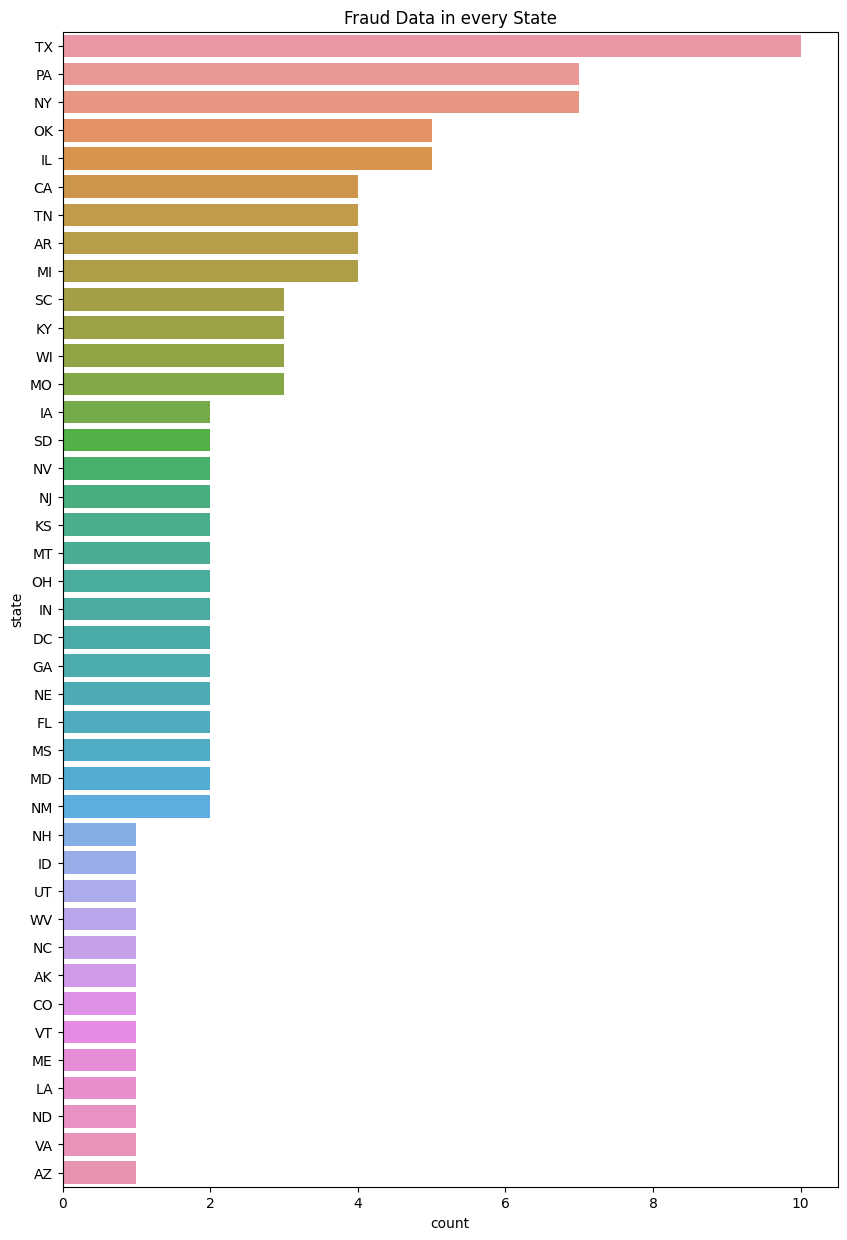

In [24]:
plt.figure(figsize=(10,15))
# plot fraud data for state
sns.countplot(y='state',data=fraud_data,order=fraud_data.state.value_counts().index)
# title
plt.title('Fraud Data in every State')


Text(0.5, 1.0, 'Month Vs Counts')

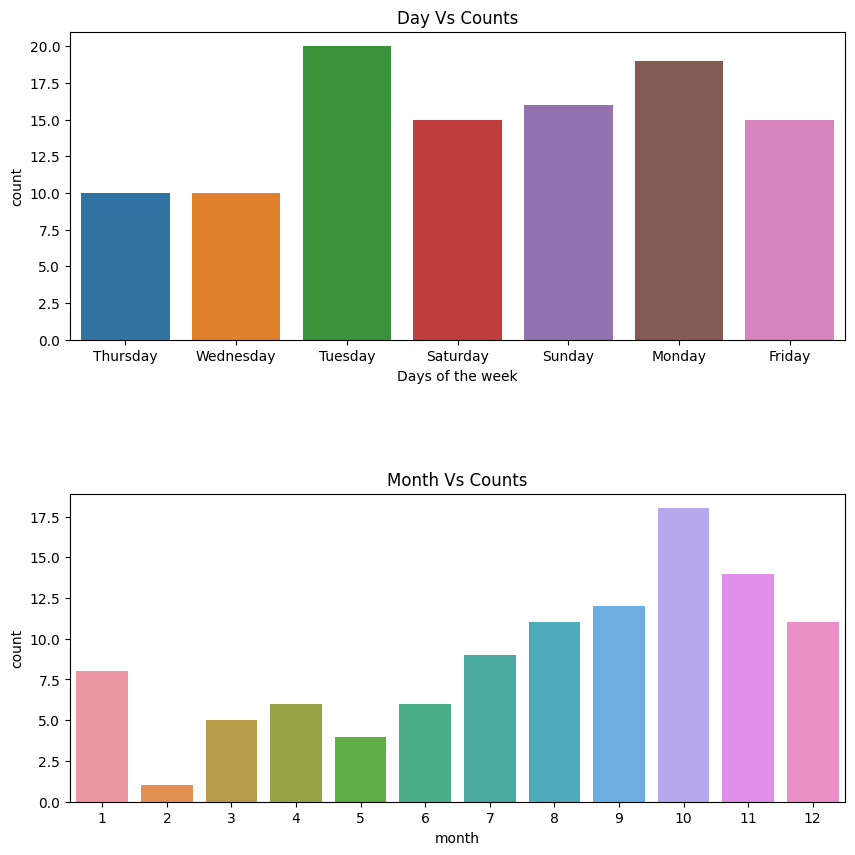

In [25]:
# plot fraud data for day_name

plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
sns.countplot(x='day_name',data=fraud_data)
plt.title('Day Vs Counts')
plt.xlabel('Days of the week')


plt.subplots_adjust(hspace=0.5)  # Add space between subplots


plt.subplot(2,1,2)
sns.countplot(x='month',data=fraud_data)
plt.title('Month Vs Counts')


Text(0.5, 1.0, 'Fraud Data - By Hour')

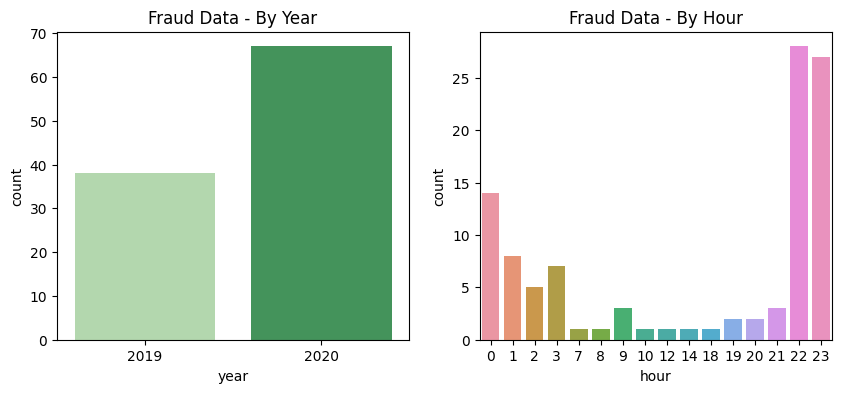

In [26]:
# plot fraud data for year

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
#sns.countplot(y='year', data=fraud_data, order=fraud_data['year'].value_counts().index, palette='Blues')
sns.countplot(x='year',data=fraud_data, palette='Greens')
plt.title('Fraud Data - By Year')

plt.subplot(1,2,2)
sns.countplot(x='hour',data=fraud_data)
plt.title('Fraud Data - By Hour')


Text(0.5, 1.0, 'Age Distribution in Fraud data')

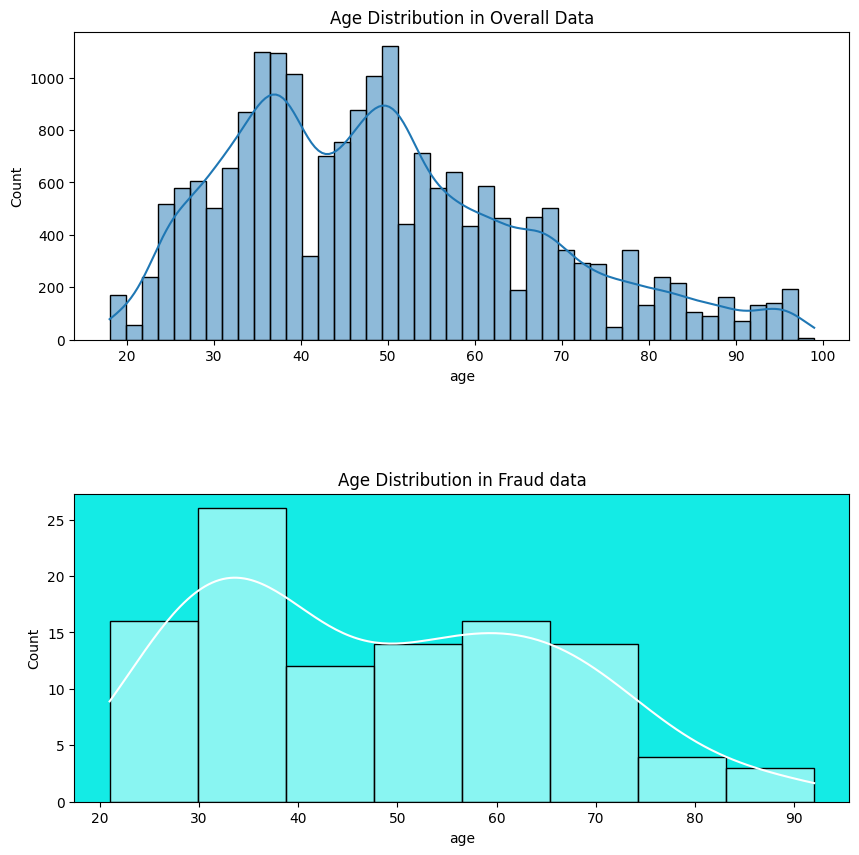

In [27]:
# plot age

plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
sns.histplot(df.age,kde=True)
plt.title("Age Distribution in Overall Data")

plt.subplots_adjust(hspace=0.5)  # Add space between subplots

#plot age with fraud_data


plt.subplot(2,1,2)
ax = sns.histplot(fraud_data.age,kde=True,color='white')
ax.set_facecolor('#14ebe5')  # Set background color to light gray

plt.title("Age Distribution in Fraud data")


### Insight: 
* The age distribution between 25 and 55 and it's high

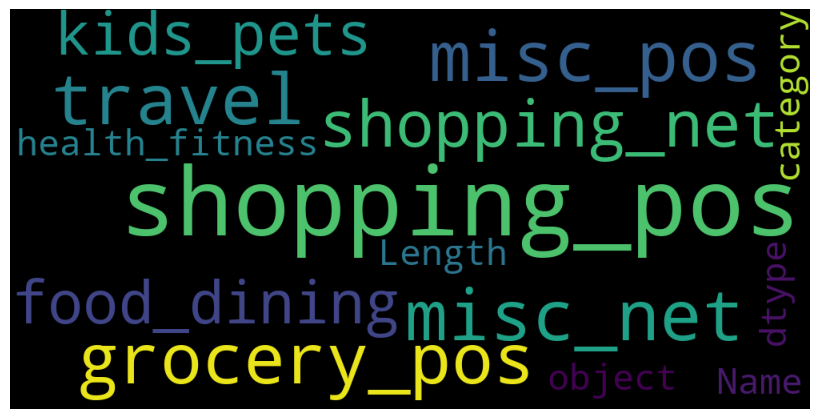

In [28]:
#  generate word cloud

from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt



# Create a wordcloud object
wordcloud = WordCloud(width=1000, height=500, background_color='black', stopwords=STOPWORDS, min_font_size=10).generate(str(df['category']))

# Plot the wordcloud
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

Text(0, 0.5, 'Count')

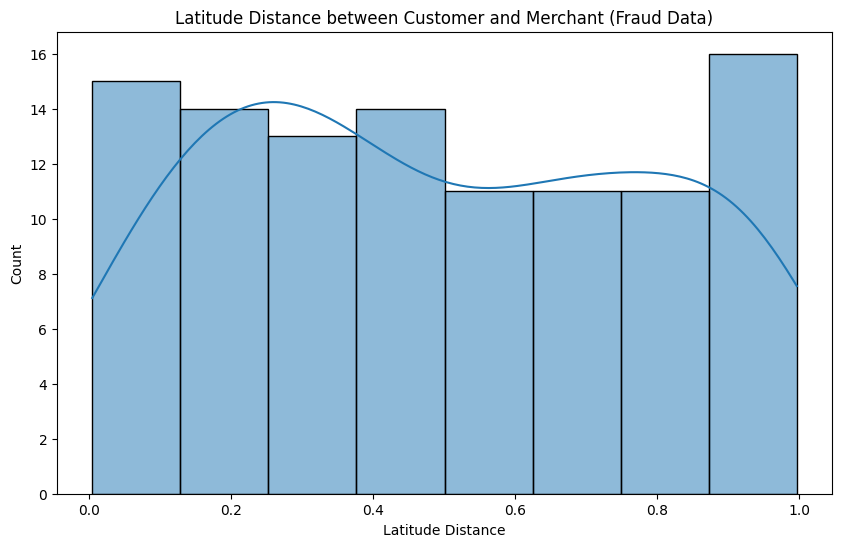

In [29]:
#plot lat_dist_cust_merch

data = df.query('is_fraud == 1')

plt.figure(figsize=(10, 6))
sns.histplot(x='lat_dist_cust_merch', data=data, kde=True)
plt.title('Latitude Distance between Customer and Merchant (Fraud Data)')
plt.xlabel('Latitude Distance')
plt.ylabel('Count')


Text(0, 0.5, 'Count')

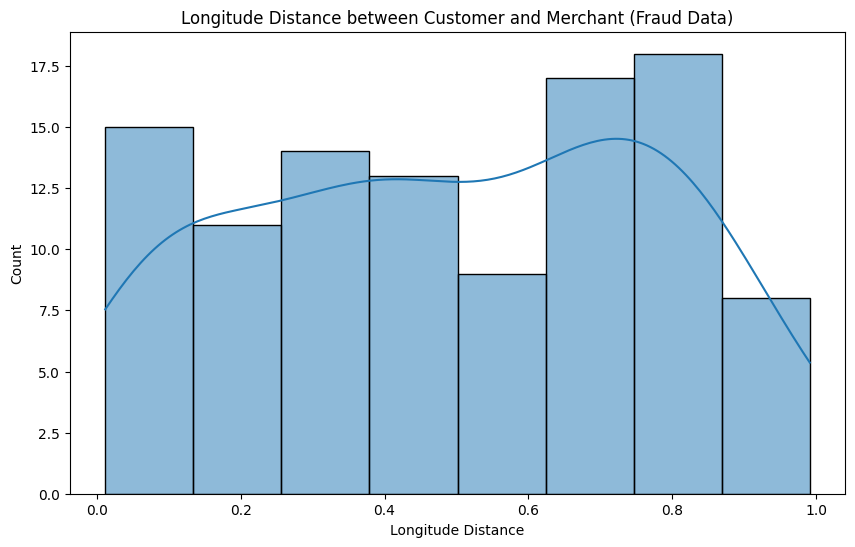

In [30]:
#plot long_dist_cust_merch

plt.figure(figsize=(10, 6))
sns.histplot(x='long_dist_cust_merch', data=data, kde=True)
plt.title('Longitude Distance between Customer and Merchant (Fraud Data)')
plt.xlabel('Longitude Distance')
plt.ylabel('Count')


# Encoding

Create a copy of the DataFrame 'df' and assign it to the variable df_copy. It uses scikit-learn's LabelEncoder() function to perform label encoding on the copied dataframe.


In [31]:
# Encoding
df_copy = df.copy()

# Label Encoding
le = LabelEncoder()

df_copy

,cc_num,merchant,category,amt,first,last,gender,state,city_pop,job,unix_time,is_fraud,year,month,day_name,hour,age,lat_dist_cust_merch,long_dist_cust_merch
0,5.359540e+15,fraud_Mosciski Group,travel,8517.38,Michael,Francis,M,MT,18182,"Engineer, drilling",1380145007,0,2020,9,Friday,21,48,0.245562,0.289753
1,3.513620e+15,fraud_Dooley-Thompson,misc_net,187.99,Amber,Perez,F,SD,355,Financial adviser,1384491501,0,2020,11,Sunday,4,68,0.932368,0.123922
2,3.023540e+13,fraud_Roberts-Beahan,misc_pos,7.81,James,Baldwin,M,WV,5512,Exhibition designer,1384344918,0,2020,11,Friday,12,43,0.694781,0.671837
3,6.011100e+15,fraud_Kunze Inc,grocery_pos,122.29,Valerie,Davis,F,VA,1970,Energy engineer,1372496117,0,2020,6,Monday,8,38,0.283916,0.247275
4,3.537800e+15,"fraud_Greenholt, O'Hara and Balistreri",shopping_net,9.21,Christie,Mendoza,F,WA,584,Medical technical officer,1374130600,0,2020,7,Saturday,6,54,0.514435,0.873073
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,4.861310e+18,fraud_Runte-Mohr,food_dining,41.66,Ashley,Cruz,F,LA,10076,"Surveyor, rural practice",1352051592,0,2019,11,Monday,17,46,0.035989,0.820476
9996,3.540080e+15,fraud_Goyette-Gerhold,kids_pets,20.73,Christian,Johns,M,MN,5211,Chief Strategy Officer,1371046060,0,2020,6,Friday,14,36,0.128307,0.548896
9997,3.523840e+15,fraud_Hermann and Sons,shopping_pos,6.52,Grace,Williams,F,AL,1412,Drilling engineer,1336503710,0,2019,5,Wednesday,19,53,0.499948,0.320272
9998,4.933460e+15,"fraud_Mueller, Gerhold and Mueller",health_fitness,30.44,Richard,Carter,M,MN,1022298,Chemical engineer,1334176979,0,2019,4,Thursday,20,47,0.500717,0.811789


Performing label encoding

In [32]:
# Select a subset of columns from the copied dataframe and store them in a new dataframe called 'catagories'
catagories = df_copy[['category','gender','state','job','day_name','first','last','merchant']]

# Apply label encoding to each selected column and store the encoded values in the corresponding columns of the copied dataframe
for i in catagories.columns:
    df_copy[i] = le.fit_transform(df_copy[i])
    
# Display the updated copied dataframe
df_copy.head()

,cc_num,merchant,category,amt,first,last,gender,state,city_pop,job,unix_time,is_fraud,year,month,day_name,hour,age,lat_dist_cust_merch,long_dist_cust_merch
0,5.359540e+15,441,13,8517.38,233,138,1,25,18182,156,1380145007,0,2020,9,0,21,48,0.245562,0.289753
1,3.513620e+15,142,8,187.99,11,329,0,40,355,186,1384491501,0,2020,11,3,4,68,0.932368,0.123922
2,3.023540e+13,521,9,7.81,143,16,1,48,5512,179,1384344918,0,2020,11,0,12,43,0.694781,0.671837
3,6.011100e+15,352,4,122.29,323,96,0,44,1970,144,1372496117,0,2020,6,1,8,38,0.283916,0.247275
4,3.537800e+15,209,11,9.21,64,278,0,46,584,280,1374130600,0,2020,7,2,6,54,0.514435,0.873073


In [33]:
# Compute chi-squared test between the selected categorical features and the target variable "is_fraud"
score=chi2(df_copy[['category','gender','state','job','day_name','first','last','merchant']],df_copy.is_fraud)
print('Score is: ',score)

# Create a pandas series with the chi-squared statistics and the selected feature names as the index
pd.Series(score[0],catagories.columns)


Score is:  (array([1.39566890e+01, 6.64529237e-01, 1.21689975e+00, 2.18500540e+01,
       7.35985296e-03, 2.04148062e+02, 1.81285938e+02, 3.88268545e+01]), array([1.87070848e-04, 4.14965492e-01, 2.69969937e-01, 2.94808297e-06,
       9.31633686e-01, 2.59822734e-46, 2.53894477e-41, 4.63112653e-10]))


category     13.956689
gender        0.664529
state         1.216900
job          21.850054
day_name      0.007360
first       204.148062
last        181.285938
merchant     38.826854
dtype: float64

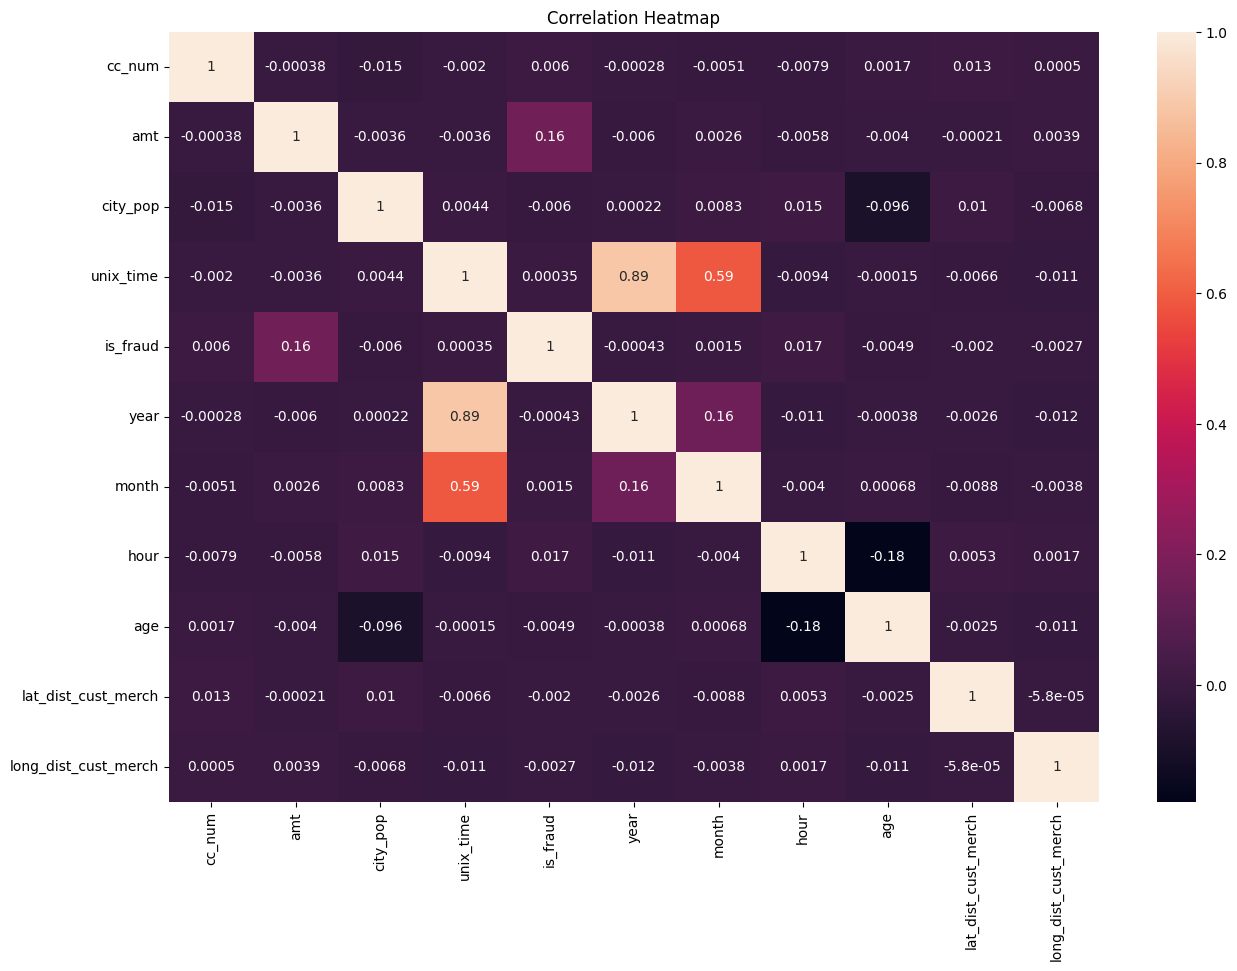

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns from the DataFrame
numeric_columns = df.select_dtypes(include='number')

plt.figure(figsize=(15, 10))
sns.heatmap(numeric_columns.corr(), annot=True)
plt.title('Correlation Heatmap')
plt.show()


# Spliting Data

In [35]:

# Define X and y variables for the classification problem
X = df_copy.drop('is_fraud', axis=1)
y = df_copy['is_fraud']

# Split the data into training and testing sets using train_test_split()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Print the shapes of the data after splitting
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


(14000, 18)
(14000,)
(6000, 18)
(6000,)


# Balancing  the data
using the Synthetic Minority Over-sampling Technique (SMOTE) to balance the imbalanced classes in your classification problem

In [36]:
#balancing the data
smote = SMOTE()

before smote technique

In [37]:
#before smote technique
print("Before SMOTE: ",y_train.value_counts())

Before SMOTE:  is_fraud
0    13930
1       70
Name: count, dtype: int64


# Perform oversampling on the training data
The fit_resample() method from the SMOTE class in imbalanced-learn is used to perform oversampling on the minority class (in this case, the "is_fraud" class) to address class imbalance by generating synthetic samples. This will result in a more balanced training dataset that can be used to train a machine learning model with better performance on both the minority and majority classes.

In [38]:
# perform oversampling on the training data to address class imbalance
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

After smote technique

In [39]:
# print the value counts of the target variable "is_fraud" after SMOTE
print("After SMOTE: ",y_train_smote.value_counts())

After SMOTE:  is_fraud
0    13930
1    13930
Name: count, dtype: int64


In [40]:
print(X_train_smote.shape)
print(y_train_smote.shape)

(27860, 18)
(27860,)


# Feature Scaling

In [41]:
# Feature Scaling

scaler = MinMaxScaler()

scaled_X_train = scaler.fit_transform(X_train_smote)
scaled_X_test = scaler.transform(X_test)

# Creating a function to run models

The run_model function runs a specified machine learning model on the scaled training and test data, and prints out metrics and evaluation results

In [42]:
#making function to run models

accuracy = []
recall = []


# create a function with name run_model
def run_model(model):
        model.fit(scaled_X_train , y_train_smote) # fit the model on the scaled training data
        y_pred_train = model.predict(scaled_X_train) # get predicted values for the training data
        y_pred_test = model.predict(scaled_X_test) # get predicted values for the test data
        a = accuracy_score(y_test,y_pred_test) # calculate the accuracy score for the test data
        b = recall_score(y_test, y_pred_test) # calculate the recall score for the test data
        
        accuracy.append(a)# append the accuracy score to the accuracy list
        recall.append(b)  # append the recall score to the recall list
        
        # print the evaluation results
        print("Accuracy Score of Train Data: ",accuracy_score(y_train_smote,y_pred_train))
        print("Accuracy Score of Test Data: ",accuracy_score(y_test,y_pred_test))   
        print("Confusion Matrix of Test Data: \n",confusion_matrix(y_test,y_pred_test))
        print("Classification Report: \n",classification_report(y_test,y_pred_test))
        

### Logistic Regression

Accuracy Score of Train Data:  0.9175520459440057
Accuracy Score of Test Data:  0.9601666666666666
Confusion Matrix of Test Data: 
 [[5746  219]
 [  20   15]]
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.96      0.98      5965
           1       0.06      0.43      0.11        35

    accuracy                           0.96      6000
   macro avg       0.53      0.70      0.55      6000
weighted avg       0.99      0.96      0.97      6000



Text(0.5, 36.72222222222221, 'Predicted')

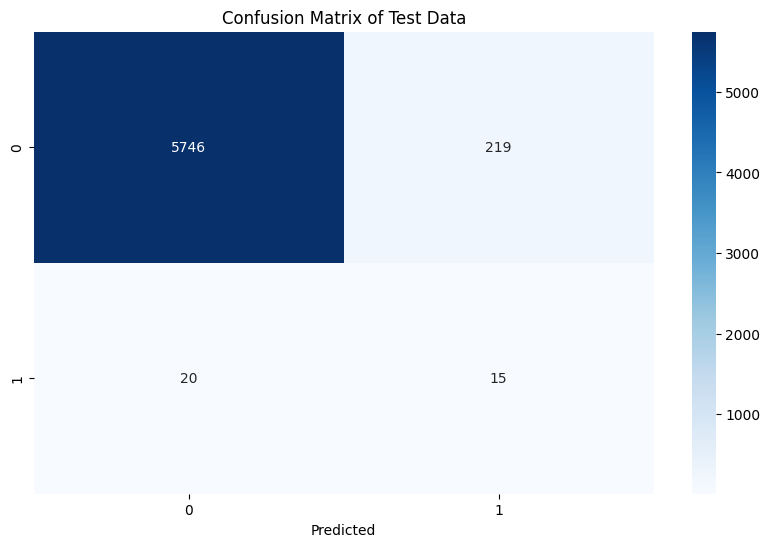

In [43]:
#Logistic Regression

log_reg = LogisticRegression() # define a logistic regression model
run_model(log_reg) # run the logistic regression model using the run_model function

# generate a heatmap of the confusion matrix for the test data
plt.figure(figsize=(10, 6))
sns.heatmap(confusion_matrix(y_test, log_reg.predict(scaled_X_test)), annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix of Test Data')
plt.xlabel('Predicted')


In [44]:
# print accuracy and recall
print("Accuracy: ",accuracy)
print("Recall: ",recall)


Accuracy:  [0.9601666666666666]
Recall:  [0.42857142857142855]


In [45]:
# AUC ROC curve

y_pred_roc = log_reg.predict_proba(scaled_X_test)
y_pred_roc

array([[0.91661987, 0.08338013],
       [0.55954499, 0.44045501],
       [0.59080437, 0.40919563],
       ...,
       [0.41058015, 0.58941985],
       [0.87368116, 0.12631884],
       [0.60869259, 0.39130741]])

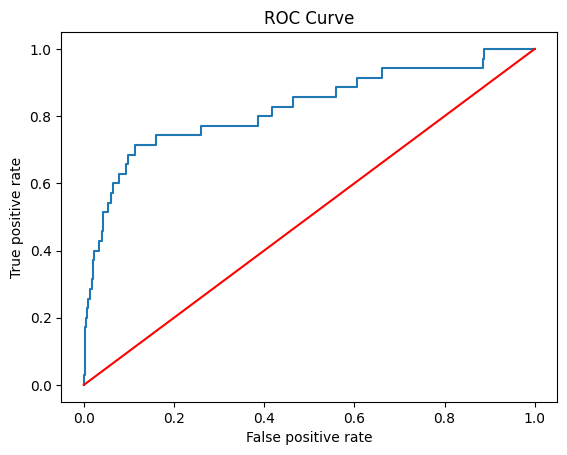

In [46]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_roc[:,1])

plt.plot(fpr,tpr)
plt.plot(fpr,fpr,'r-')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC Curve')
plt.show()



### Decision Tree Classifier

In [47]:
# define a decision tree classifier model
dtc = DecisionTreeClassifier(criterion='gini',max_depth=3 )
run_model(dtc) # run the decision tree classifier model using the run_model function

Accuracy Score of Train Data:  0.8998205312275664
Accuracy Score of Test Data:  0.9536666666666667
Confusion Matrix of Test Data: 
 [[5697  268]
 [  10   25]]
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.96      0.98      5965
           1       0.09      0.71      0.15        35

    accuracy                           0.95      6000
   macro avg       0.54      0.83      0.56      6000
weighted avg       0.99      0.95      0.97      6000



In [48]:
# decision tree classifier
pd.Series(dtc.feature_importances_,X_train_smote.columns)*100


cc_num                   0.000000
merchant                 0.000000
category                 4.956699
amt                     92.076515
first                    0.000000
last                     0.000000
gender                   2.481412
state                    0.000000
city_pop                 0.000000
job                      0.000000
unix_time                0.000000
year                     0.000000
month                    0.000000
day_name                 0.000000
hour                     0.000000
age                      0.485374
lat_dist_cust_merch      0.000000
long_dist_cust_merch     0.000000
dtype: float64

## Random Forest Classifier

In [49]:
# Random Forest Classifier
rfc=RandomForestClassifier(n_estimators=100, max_depth=2,criterion='gini')
run_model(rfc)

Accuracy Score of Train Data:  0.9016152189519023
Accuracy Score of Test Data:  0.9448333333333333
Confusion Matrix of Test Data: 
 [[5641  324]
 [   7   28]]
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.95      0.97      5965
           1       0.08      0.80      0.14        35

    accuracy                           0.94      6000
   macro avg       0.54      0.87      0.56      6000
weighted avg       0.99      0.94      0.97      6000



In [50]:
#  SVM

svc = SVC(kernel='linear',probability=True)
run_model(svc)

Accuracy Score of Train Data:  0.9281407035175879
Accuracy Score of Test Data:  0.981
Confusion Matrix of Test Data: 
 [[5863  102]
 [  12   23]]
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.98      0.99      5965
           1       0.18      0.66      0.29        35

    accuracy                           0.98      6000
   macro avg       0.59      0.82      0.64      6000
weighted avg       0.99      0.98      0.99      6000



In [51]:
svc=SVC(C=1.0,kernel='rbf',gamma='scale')

run_model(svc)

Accuracy Score of Train Data:  0.9916726489590811
Accuracy Score of Test Data:  0.9806666666666667
Confusion Matrix of Test Data: 
 [[5879   86]
 [  30    5]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      5965
           1       0.05      0.14      0.08        35

    accuracy                           0.98      6000
   macro avg       0.52      0.56      0.53      6000
weighted avg       0.99      0.98      0.98      6000



# Accuracy scores 

In [52]:
# Fit and predict for each classifier
from sklearn.metrics import accuracy_score

# Logistic Regression
log_reg.fit(scaled_X_train, y_train_smote)
y_pred_log_reg = log_reg.predict(scaled_X_test)

# Decision Tree Classifier
dtc.fit(scaled_X_train, y_train_smote)
y_pred_dtc = dtc.predict(scaled_X_test)

# Random Forest Classifier
rfc.fit(scaled_X_train, y_train_smote)
y_pred_rfc = rfc.predict(scaled_X_test)

# SVM
svc.fit(scaled_X_train, y_train_smote)
y_pred_svc = svc.predict(scaled_X_test)

# Accuracy score for each classifier
print('Accuracy score for Logistic Regression: ', accuracy_score(y_test, y_pred_log_reg))
print('Accuracy score for Decision Tree Classifier: ', accuracy_score(y_test, y_pred_dtc))
print('Accuracy score for Random Forest Classifier: ', accuracy_score(y_test, y_pred_rfc))
print('Accuracy score for SVM: ', accuracy_score(y_test, y_pred_svc))





Accuracy score for Logistic Regression:  0.9601666666666666
Accuracy score for Decision Tree Classifier:  0.9536666666666667
Accuracy score for Random Forest Classifier:  0.9461666666666667
Accuracy score for SVM:  0.9806666666666667


In [53]:
algorithm = ['LogisticRegression','DecisionTree','RandomForest','linear_svc', 'rbf_svc']


In [54]:
performance=pd.DataFrame({'Algorithms':algorithm,'Accuracy':accuracy,'recall':recall})

performance

,Algorithms,Accuracy,recall
0,LogisticRegression,0.960167,0.428571
1,DecisionTree,0.953667,0.714286
2,RandomForest,0.944833,0.800000
3,linear_svc,0.981000,0.657143
4,rbf_svc,0.980667,0.142857


In [55]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# define the neural network
def create_nn():
    model = Sequential()
    model.add(Dense(128, activation='relu', input_shape=(X.shape[1],)))
    model.add(Dropout(0.2))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# create a function with the name run_model
def run_model():
    nn_model = create_nn()
    early_stop = EarlyStopping(monitor='val_loss', patience=10)
    nn_model.fit(scaled_X_train, y_train_smote, epochs=50, batch_size=32, 
                 validation_data=(scaled_X_test, y_test), callbacks=[early_stop])
    
    # get predicted values for training and test data
    y_pred_train = nn_model.predict(scaled_X_train)
    y_pred_test = nn_model.predict(scaled_X_test)
    
    # calculate evaluation metrics and append to accuracy and recall lists
    a = accuracy_score(y_test, y_pred_test)
    b = recall_score(y_test, y_pred_test)
    accuracy.append(a)
    recall.append(b)

    # print evaluation results
    print("Accuracy Score of Train Data: ", accuracy_score(y_train_smote, y_pred_train))
    print("Accuracy Score of Test Data: ", a)
    print("Confusion Matrix of Test Data: \n", confusion_matrix(y_test, y_pred_test))
    print("Classification Report: \n", classification_report(y_test, y_pred_test))


In [56]:
import statistics


# calculate mean and standard deviation of accuracy and recall
mean_accuracy = sum(accuracy) / len(accuracy)
std_accuracy = statistics.stdev(accuracy)
mean_recall = sum(recall) / len(recall)
std_recall = statistics.stdev(recall)

# print descriptive evaluation statistics
print("Average Accuracy: {:.2%} (+/- {:.2%})".format(mean_accuracy, std_accuracy))
print("Average Recall: {:.2%} (+/- {:.2%})".format(mean_recall, std_recall))


Average Accuracy: 96.41% (+/- 1.62%)
Average Recall: 54.86% (+/- 26.53%)


In [57]:
from sklearn.ensemble import GradientBoostingClassifier

gbm = GradientBoostingClassifier()
gbm.fit(X_train, y_train)

# get predicted values for training and test data
y_pred_train = gbm.predict(X_train)
y_pred_test = gbm.predict(X_test)

# calculate evaluation metrics and append to accuracy and recall lists
a = accuracy_score(y_test, y_pred_test)
b = recall_score(y_test, y_pred_test)
accuracy.append(a)
recall.append(b)

# print evaluation results
print("Accuracy Score of Train Data: ", accuracy_score(y_train, y_pred_train))
print("Accuracy Score of Test Data: ", a)
print("Confusion Matrix of Test Data: \n", confusion_matrix(y_test, y_pred_test))
print("Classification Report: \n", classification_report(y_test, y_pred_test))



Accuracy Score of Train Data:  0.9997857142857143
Accuracy Score of Test Data:  0.9961666666666666
Confusion Matrix of Test Data: 
 [[5957    8]
 [  15   20]]
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      5965
           1       0.71      0.57      0.63        35

    accuracy                           1.00      6000
   macro avg       0.86      0.79      0.82      6000
weighted avg       1.00      1.00      1.00      6000

